In [69]:
filename0 = 'Petri_1-2023-04-27.csv'
filename1 = 'Petri_1-2023-05-04.csv'
filename2 = 'Petri_1-2023-05-11.csv'
filename3 = 'Petri_1-2023-05-18.csv'
hnames = ["datetime", "entry_id", "temperature", "humidity", "uptime"]
import pandas as pd
import numpy as np
df0 = pd.read_csv(filename0, sep=',', decimal='.', names=hnames, header=0)
df0['datetime'] = pd.to_datetime(df0['datetime'])
df0.set_index('datetime', inplace=True)
df1 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.set_index('datetime', inplace=True)
df2 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df2['datetime'] = pd.to_datetime(df2['datetime'])
df2.set_index('datetime', inplace=True)
df3 = pd.read_csv(filename1, sep=',', decimal='.', names=hnames, header=0)
df3['datetime'] = pd.to_datetime(df3['datetime'])
df3.set_index('datetime', inplace=True)
df = pd.concat([df0, df1, df2, df3])
df

,entry_id,temperature,humidity,uptime
datetime,,,,
2023-04-20 00:02:11+00:00,4456,17.7,19.0,142343337
2023-04-20 00:04:42+00:00,4457,17.7,19.1,142494379
2023-04-20 00:09:24+00:00,4458,17.7,19.1,142775867
2023-04-20 00:14:55+00:00,4459,17.6,19.1,143107555
2023-04-20 00:17:01+00:00,4460,17.6,19.1,143233488
...,...,...,...,...
2023-05-03 23:38:58+00:00,11064,11.8,27.9,7754479
2023-05-03 23:45:35+00:00,11065,11.7,28.0,8151419
2023-05-03 23:49:12+00:00,11066,11.7,27.9,8367733


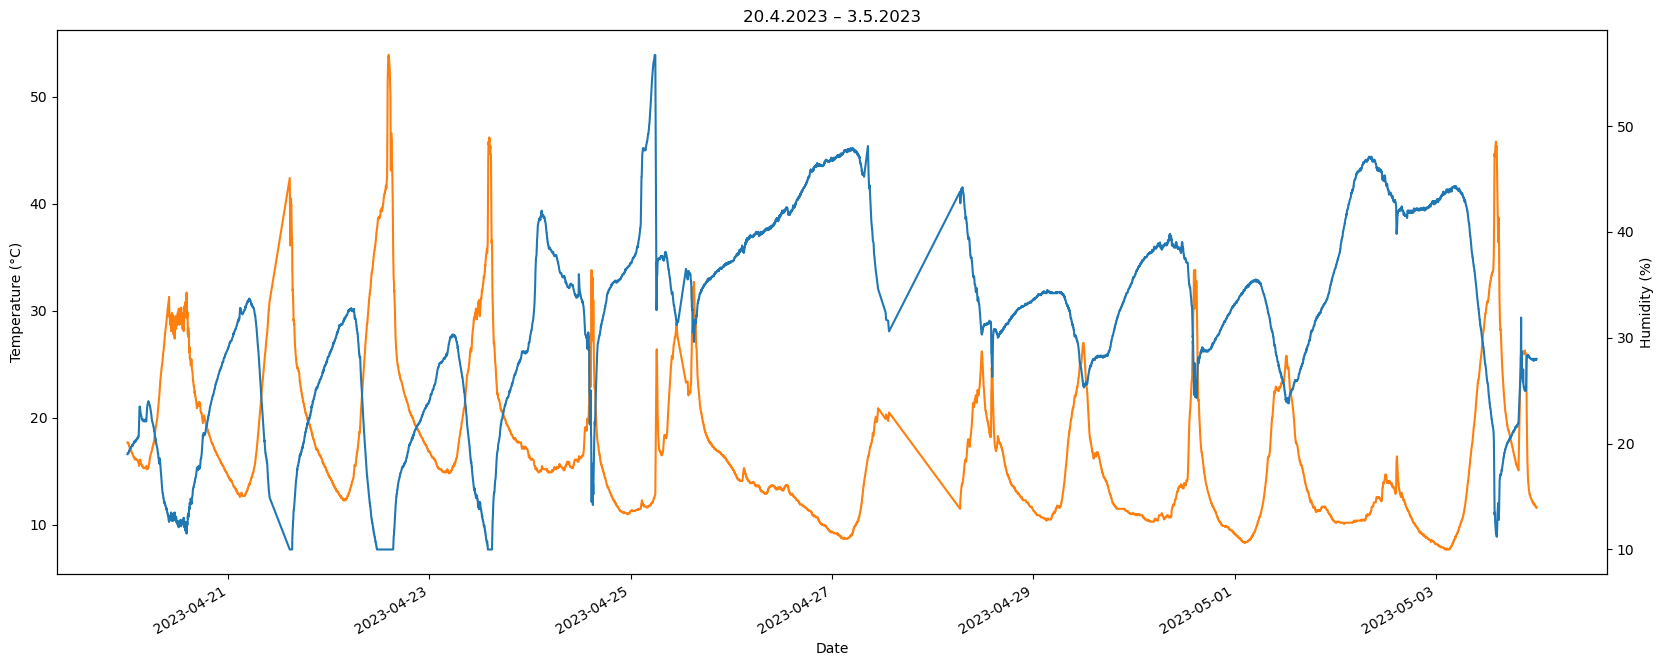

In [71]:
import matplotlib.pyplot as plt
tdata = df[["temperature", "humidity"]]
fdate = tdata.index[0]
ldate = tdata.index[-1]
title = str(fdate.day) + "." + str(fdate.month) + "." + str(fdate.year) + " – " + str(ldate.day) + "." + str(ldate.month) + "." + str(ldate.year)
fig, ax = plt.subplots()
plt.title(title)
fig.set_figwidth(20)
fig.set_figheight(8)
ax.set_ylabel("Temperature (°C)")
tdata["humidity"].plot(ax=ax, secondary_y=True, style='-', color="C0")
tdata["temperature"].plot(ax=ax, style='-', color="C1")
ax.right_ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Date")
plt.show()